In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-03-26 21:19:48--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-03-26 21:19:49--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>] 191.36K  --.-KB/s    in 0.03s   

2025-03-26 21:19:49 (5.48 MB/s) - ‘framingham.csv’ save

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [2]:
import pandas as pd
data = pd.read_csv("framingham.csv")

In [3]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva

#### Cuantos datos tiene la tabla

In [4]:


data.shape[0]


4238

#### Medidas de tendencia central de las variables.

In [5]:

data.describe()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Grafico de Barras con el número de hombres y mujeres

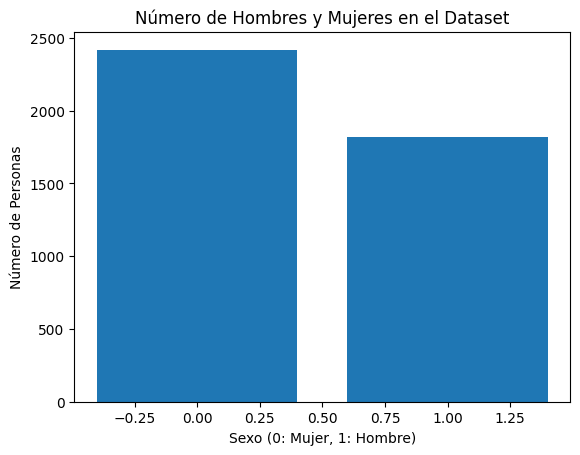

In [6]:


import matplotlib.pyplot as plt


gender_counts = data['male'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)


plt.xlabel('Sexo (0: Mujer, 1: Hombre)')
plt.ylabel('Número de Personas')
plt.title('Número de Hombres y Mujeres en el Dataset')


plt.show()


#### Realice un ggrafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



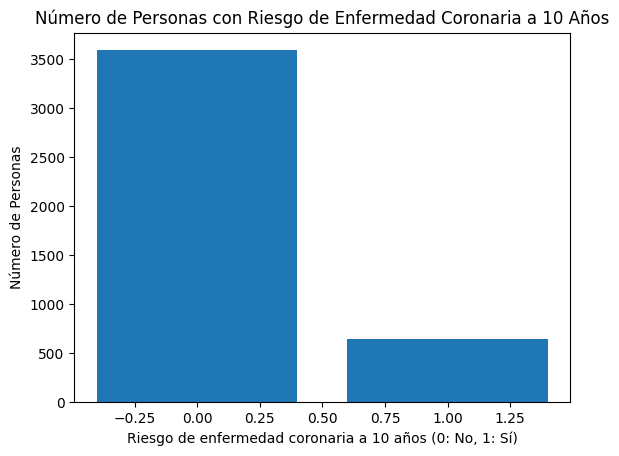

In [7]:

import matplotlib.pyplot as plt
chd_counts = data['TenYearCHD'].value_counts()

plt.bar(chd_counts.index, chd_counts.values)

plt.xlabel('Riesgo de enfermedad coronaria a 10 años (0: No, 1: Sí)')
plt.ylabel('Número de Personas')
plt.title('Número de Personas con Riesgo de Enfermedad Coronaria a 10 Años')

plt.show()


#### Realice un grafico de densidad del BMI

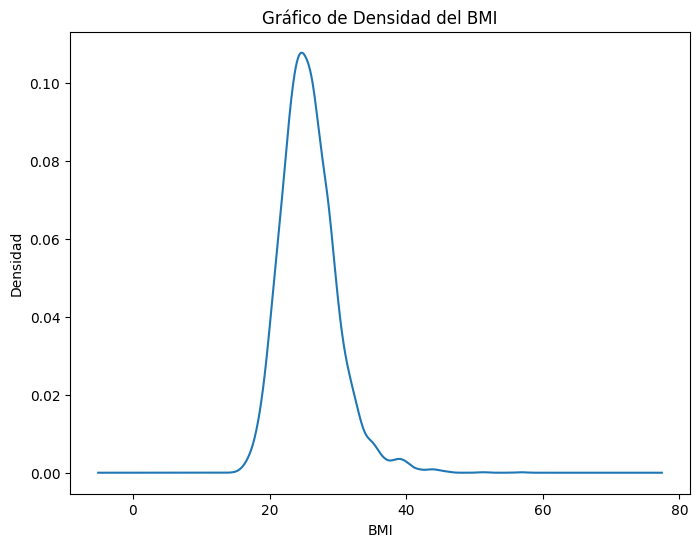

In [8]:


import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
data['BMI'].plot(kind='kde')
plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad del BMI')
plt.show()


#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

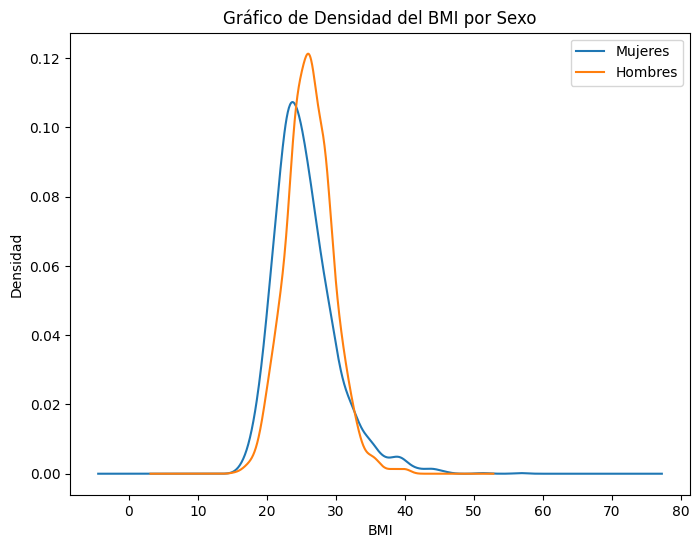

BMI promedio para hombres: 26.19
BMI promedio para mujeres: 25.51
Los hombres tienen en promedio un mayor BMI.


In [9]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
data[data['male'] == 0]['BMI'].plot(kind='kde', label='Mujeres')
data[data['male'] == 1]['BMI'].plot(kind='kde', label='Hombres')
plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad del BMI por Sexo')
plt.legend()
plt.show()

bmi_hombres = data[data['male'] == 1]['BMI'].mean()
bmi_mujeres = data[data['male'] == 0]['BMI'].mean()

print(f"BMI promedio para hombres: {bmi_hombres:.2f}")
print(f"BMI promedio para mujeres: {bmi_mujeres:.2f}")

if bmi_hombres > bmi_mujeres:
  print("Los hombres tienen en promedio un mayor BMI.")
else:
  print("Las mujeres tienen en promedio un mayor BMI.")


#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

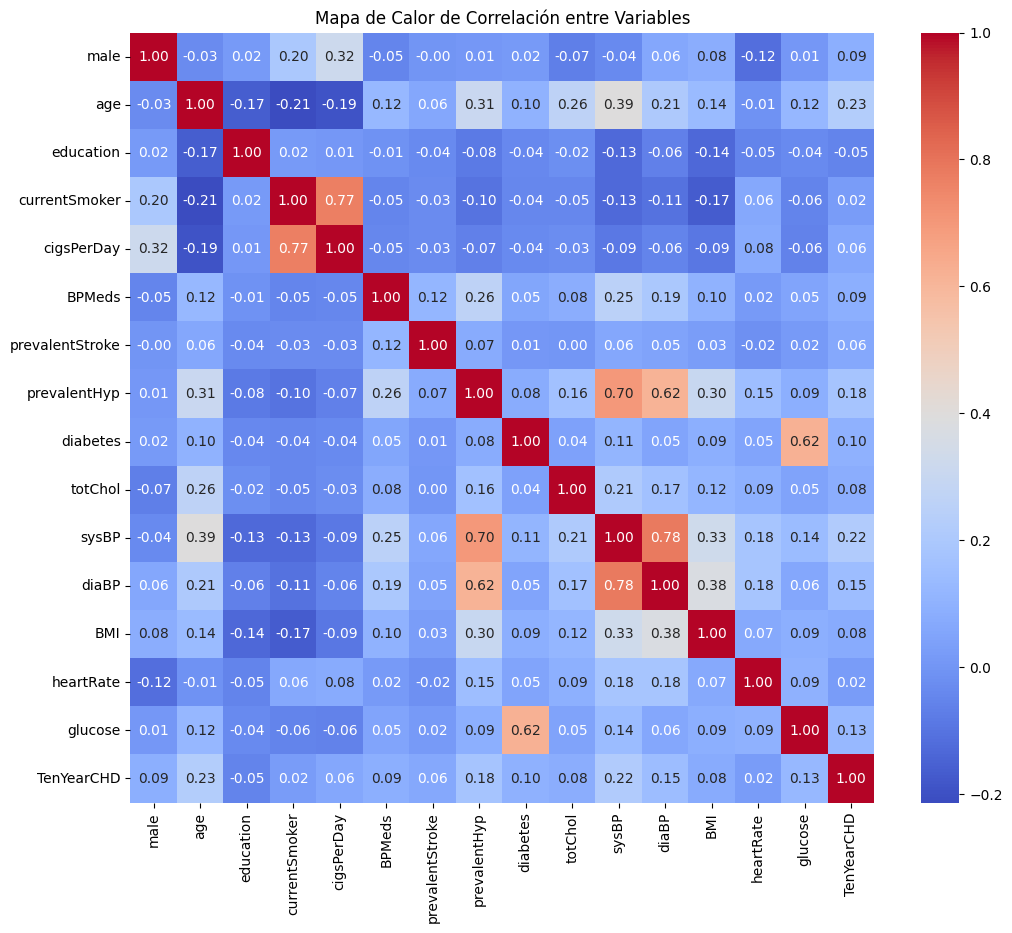

El par de variables más correlacionadas es: sysBP y diaBP, con una correlación de: 0.78


In [10]:


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


correlation_matrix = data.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()


correlation_matrix_no_diagonal = correlation_matrix.mask(np.equal(*np.indices(correlation_matrix.shape)))
max_correlation = np.nanmax(correlation_matrix_no_diagonal)
row, col = correlation_matrix_no_diagonal[correlation_matrix_no_diagonal == max_correlation].stack().idxmax()

print(f"El par de variables más correlacionadas es: {row} y {col}, con una correlación de: {max_correlation:.2f}")


¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

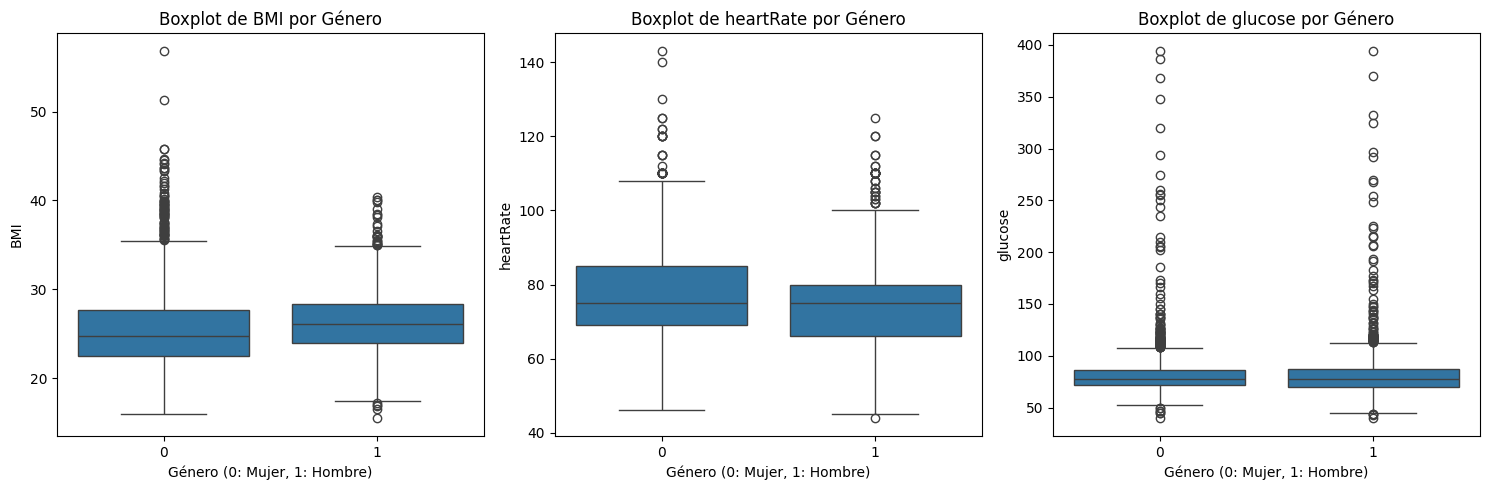

In [11]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='male', y='BMI', data=data)
plt.title('Boxplot de BMI por Género')
plt.xlabel('Género (0: Mujer, 1: Hombre)')
plt.ylabel('BMI')

plt.subplot(1, 3, 2)
sns.boxplot(x='male', y='heartRate', data=data)
plt.title('Boxplot de heartRate por Género')
plt.xlabel('Género (0: Mujer, 1: Hombre)')
plt.ylabel('heartRate')

plt.subplot(1, 3, 3)
sns.boxplot(x='male', y='glucose', data=data)
plt.title('Boxplot de glucose por Género')
plt.xlabel('Género (0: Mujer, 1: Hombre)')
plt.ylabel('glucose')

plt.tight_layout()
plt.show()


### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

In [12]:

for column in data.columns:
  null_count = data[column].isnull().sum()
  print(f"Variable '{column}' has {null_count} null values.")


Variable 'male' has 0 null values.
Variable 'age' has 0 null values.
Variable 'education' has 105 null values.
Variable 'currentSmoker' has 0 null values.
Variable 'cigsPerDay' has 29 null values.
Variable 'BPMeds' has 53 null values.
Variable 'prevalentStroke' has 0 null values.
Variable 'prevalentHyp' has 0 null values.
Variable 'diabetes' has 0 null values.
Variable 'totChol' has 50 null values.
Variable 'sysBP' has 0 null values.
Variable 'diaBP' has 0 null values.
Variable 'BMI' has 19 null values.
Variable 'heartRate' has 1 null values.
Variable 'glucose' has 388 null values.
Variable 'TenYearCHD' has 0 null values.


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [13]:


data_cleaned = data.dropna()
print(f"Después de borrar los datos faltantes quedan {data_cleaned.shape[0]} datos.")


Después de borrar los datos faltantes quedan 3656 datos.


#### Seleccione sus variables X y su variable y

In [16]:

X = data_cleaned[['age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
y = data_cleaned['TenYearCHD']


#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [15]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(f"Tamaño del dataset de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del dataset de prueba: {X_test.shape[0]}")


Tamaño del dataset de entrenamiento: 2559
Tamaño del dataset de prueba: 1097


#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [18]:


from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

In [20]:

import pandas as pd

coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
print(coefficients)

max_coefficient_feature = coefficients.loc[coefficients['coefficient'].abs().idxmax(), 'feature']
max_coefficient_value = coefficients.loc[coefficients['coefficient'].abs().idxmax(), 'coefficient']

print(f"\nLa variable '{max_coefficient_feature}' tiene el mayor efecto sobre desarrollar una enfermedad cardiaca, con un coeficiente de {max_coefficient_value:.4f}.")




         feature  coefficient
0            age     0.055465
1  currentSmoker     0.356470
2        totChol    -0.007073
3          sysBP     0.017627
4          diaBP    -0.015263
5            BMI    -0.029040
6      heartRate    -0.018959
7        glucose     0.008518

La variable 'currentSmoker' tiene el mayor efecto sobre desarrollar una enfermedad cardiaca, con un coeficiente de 0.3565.


#### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

In [21]:


from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")


precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")


Matriz de confusión:
[[912   6]
 [172   7]]
Accuracy: 0.8377
Recall: 0.0391
Precision: 0.5385
F1-score: 0.0729


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

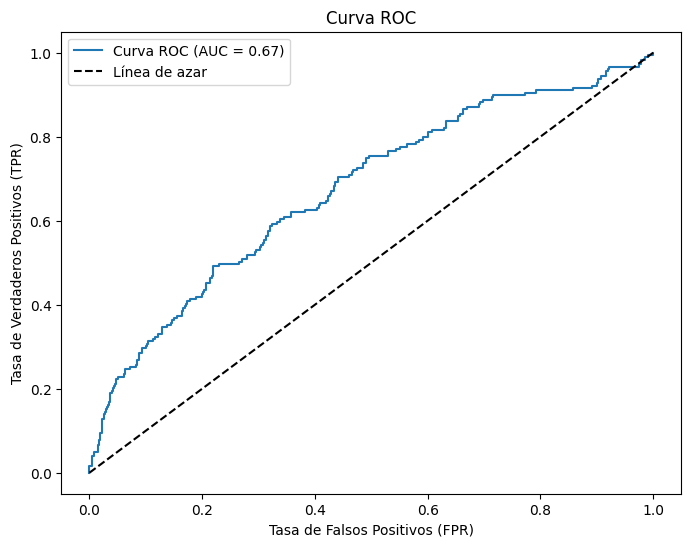

El valor del AUC es: 0.67


In [24]:


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


y_pred_proba = model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


auc = roc_auc_score(y_test, y_pred_proba)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Línea de azar')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()


print(f"El valor del AUC es: {auc:.2f}")







## Corrección desbalance de clases
1. Busque la funcion train_test_split en su codigo y agregue la opcion stratify  = y . Por que esto ayudaría con el desblance?
2. usando from imblearn.over_sampling import SMOTE mejore el performance
 3. Saque todo el modelo y la matriz y la grafica de ROC AUC

In [25]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)




Matriz de confusión:
[[580 350]
 [ 76  91]]
Accuracy: 0.6117
Recall: 0.5449
Precision: 0.2063
F1-score: 0.2993


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


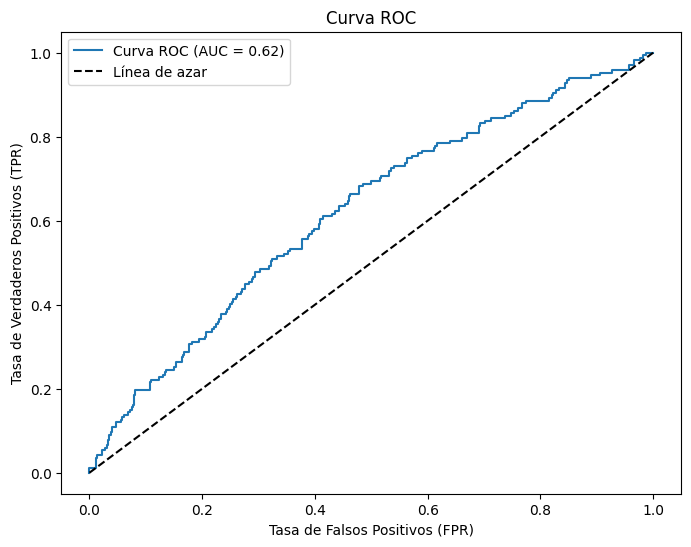

El valor del AUC es: 0.62


In [26]:


import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)


y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Línea de azar')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

print(f"El valor del AUC es: {auc:.2f}")


## Pinter el resultado con SMOTE y sin SMOTE

In [28]:

print("Resultados sin SMOTE:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


print("\nResultados con SMOTE:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Resultados sin SMOTE:
Accuracy: 0.6117
Recall: 0.5449
Precision: 0.2063
F1-score: 0.2993
AUC: 0.6207

Resultados con SMOTE:
Accuracy: 0.6117
Recall: 0.5449
Precision: 0.2063
F1-score: 0.2993
AUC: 0.6207


### Como mejora su modelo con StandardScaler()

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


Matriz de confusión:
[[921   9]
 [155  12]]
Accuracy: 0.8505
Recall: 0.0719
Precision: 0.5714
F1-score: 0.1277


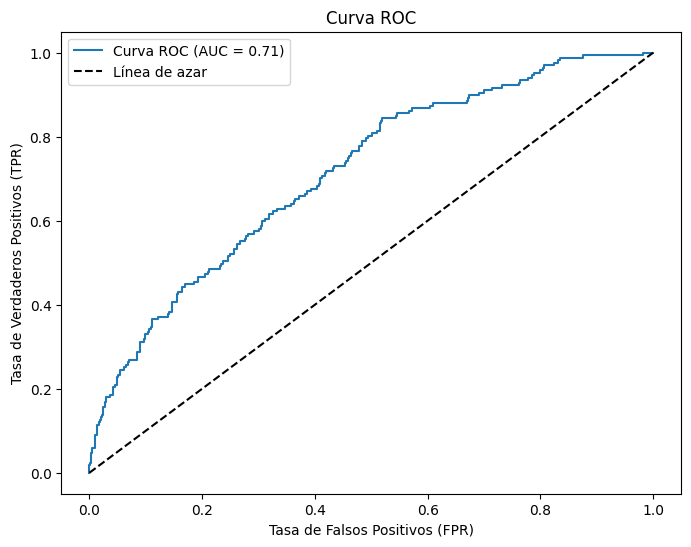

El valor del AUC es: 0.71


In [31]:


import matplotlib.pyplot as plt

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



model = LogisticRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")


y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Línea de azar')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

print(f"El valor del AUC es: {auc:.2f}")


### Pinte todas las graficas original SMOTE y SMOTE Scaler

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


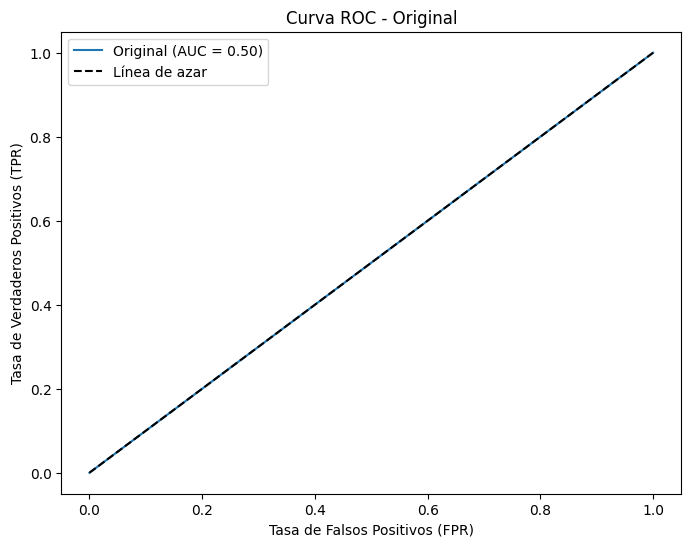

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


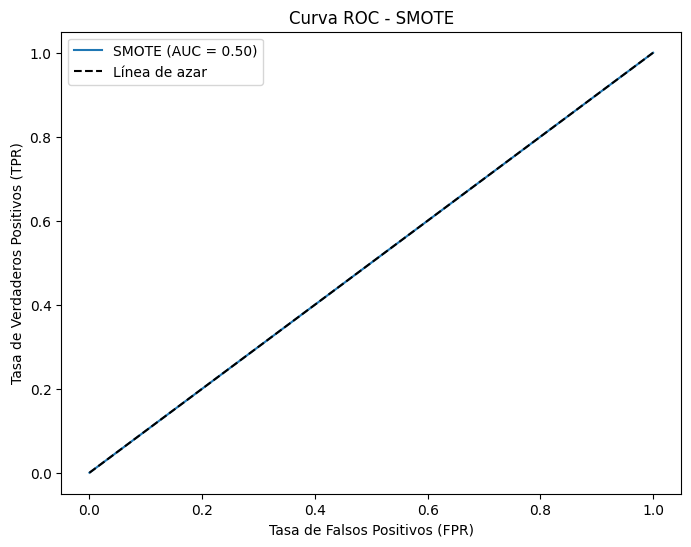

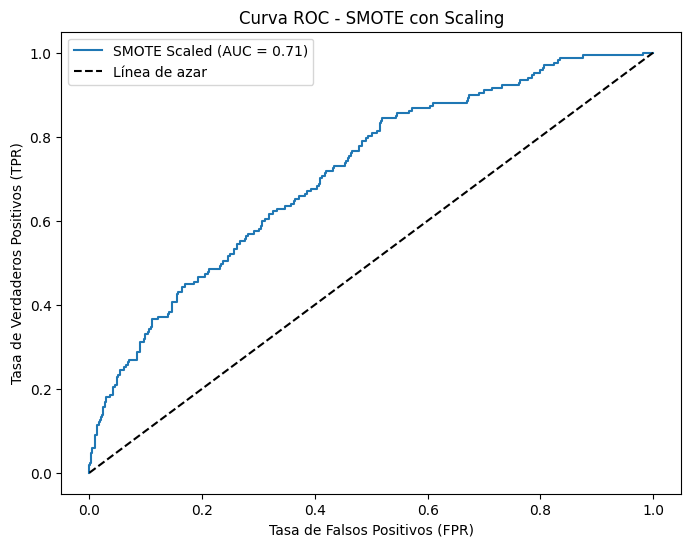

In [32]:


import matplotlib.pyplot as plt

y_pred_proba_original = model.predict_proba(X_test)[:, 1]
fpr_original, tpr_original, thresholds_original = roc_curve(y_test, y_pred_proba_original)
auc_original = roc_auc_score(y_test, y_pred_proba_original)

plt.figure(figsize=(8, 6))
plt.plot(fpr_original, tpr_original, label=f'Original (AUC = {auc_original:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Línea de azar')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Original')
plt.legend()
plt.show()



y_pred_proba_smote = model.predict_proba(X_test)[:, 1]
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_proba_smote)
auc_smote = roc_auc_score(y_test, y_pred_proba_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, label=f'SMOTE (AUC = {auc_smote:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Línea de azar')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - SMOTE')
plt.legend()
plt.show()




y_pred_proba_smote_scaled = model.predict_proba(X_test_scaled)[:, 1]
fpr_smote_scaled, tpr_smote_scaled, thresholds_smote_scaled = roc_curve(y_test, y_pred_proba_smote_scaled)
auc_smote_scaled = roc_auc_score(y_test, y_pred_proba_smote_scaled)


plt.figure(figsize=(8, 6))
plt.plot(fpr_smote_scaled, tpr_smote_scaled, label=f'SMOTE Scaled (AUC = {auc_smote_scaled:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Línea de azar')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - SMOTE con Scaling')
plt.legend()
plt.show()
